# Compare  PCA for SL, Brown , Bruzual Charlot



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab.in2p3.fr
- creation date : 2023/01/07
- update : 2023/01/09

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.decomposition import PCA

In [4]:
from astropy.io import fits

## Start

In [5]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/dagoret/MacOSX/GitHub/LSST/PhotoZ_PhD/PCA


## Read file

In [6]:
filenames = ['datatools/pca_SL_data.fits','datatools/pca_Brown_data.fits','datatools/pca_BruzualCharlot_data.fits']
sed_names = ['SL','Brown','Bruzual-Charlot']
sed_col   = ['r','b','g']
NF = len(filenames)

all_hdu = []

for filename in filenames:
    hdu = fits.open(filename)
    all_hdu.append(hdu)

In [7]:
all_data_in = []
for hdu in all_hdu:
    data_in=hdu[0].data
    all_data_in.append(data_in)

In [8]:
all_data_in[0]

array([[0.00000000e+00, 9.10000000e+01, 9.40000000e+01, ...,
        9.95000000e+03, 9.97000000e+03, 9.99000000e+03],
       [0.00000000e+00, 4.97839069e-07, 5.52382959e-07, ...,
        7.06085364e-05, 7.06330908e-05, 7.05906948e-05],
       [0.00000000e+00, 1.19574179e-06, 1.27758431e-06, ...,
        4.46025945e-05, 4.46908296e-05, 4.46647757e-05],
       ...,
       [7.36000000e+02, 2.14675694e-06, 2.50389986e-06, ...,
        2.12861759e-05, 2.12363909e-05, 2.11664152e-05],
       [7.37000000e+02, 8.31448778e-07, 9.57832321e-07, ...,
        7.00733914e-05, 6.99426115e-05, 7.00519814e-05],
       [7.38000000e+02, 7.21010321e-08, 8.01113405e-08, ...,
        1.50517900e-04, 1.50795383e-04, 1.50744720e-04]])

In [9]:
data_in=all_data_in[0]

In [10]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [11]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
flux = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

In [12]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_39702/1456229801.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000')]

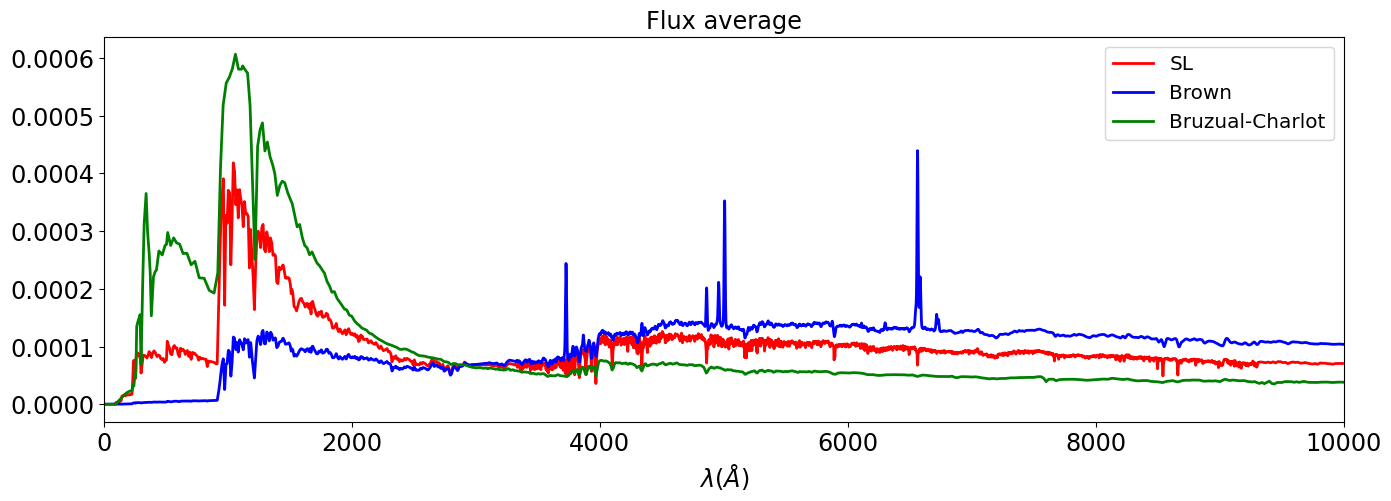

In [13]:
fig=plt.figure(figsize=(16,5))
ax=fig.add_subplot(111)
for idx in range(NF):
    data_in=all_data_in[idx]
    NSED = data_in.shape[0]-3
    NWL = data_in.shape[1]-1
    
    wavelengths = data_in[0,1:] 
    flambdas_average = data_in[1,1:] 
    flambdas_std = data_in[2,1:] 
    flux = data_in[3:,1:] 
    all_numbers = data_in[3:,0] 
    

    ax.plot(wavelengths,flambdas_average,c=sed_col[idx],label=sed_names[idx],lw=2)

ax.set_title("Flux average")
ax.set_xlim(0.,10000.)
ax.set_xlabel("$\lambda (\AA)$")
ax.legend()
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

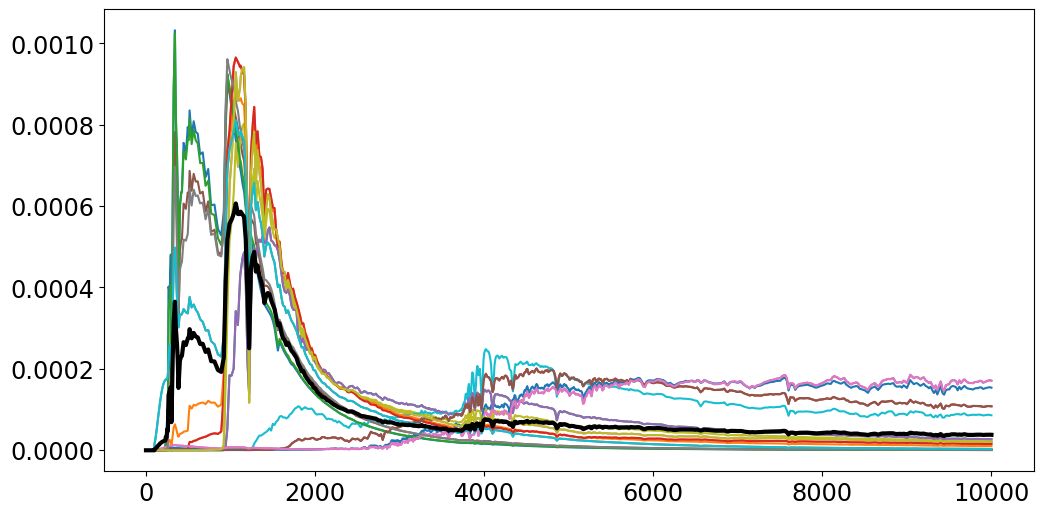

In [14]:
fig = plt.figure(figsize=(12, 6))
for idx in np.arange(20):
    plt.plot(wavelengths,flux[idx,:])  
flux_mean = flux.mean(0)
plt.plot(wavelengths,flux_mean,"k-",lw=3)
#plt.ylim(0,50.)

In [15]:
#----------------------------------------------------------------------
# Compute PCA
def compute_PCA(n_components=5):
   

    # PCA: use randomized PCA for speed
    pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
    pca.fit(flux)
    #pca_comp = np.vstack([flambdas_average,
    #                      pca.components_])
    pca_comp = np.vstack([flambdas_average,
                          pca.components_])

    return pca_comp


In [16]:
n_components = 10

all_decompositions = []

for idx in range(NF):
    data_in=all_data_in[idx]
    NSED = data_in.shape[0]-3
    NWL = data_in.shape[1]-1
    
    wavelengths = data_in[0,1:] 
    flambdas_average = data_in[1,1:] 
    flambdas_std = data_in[2,1:] 
    flux = data_in[3:,1:] 
    all_numbers = data_in[3:,0] 

    decompositions = compute_PCA(n_components)
    all_decompositions.append(decompositions)  

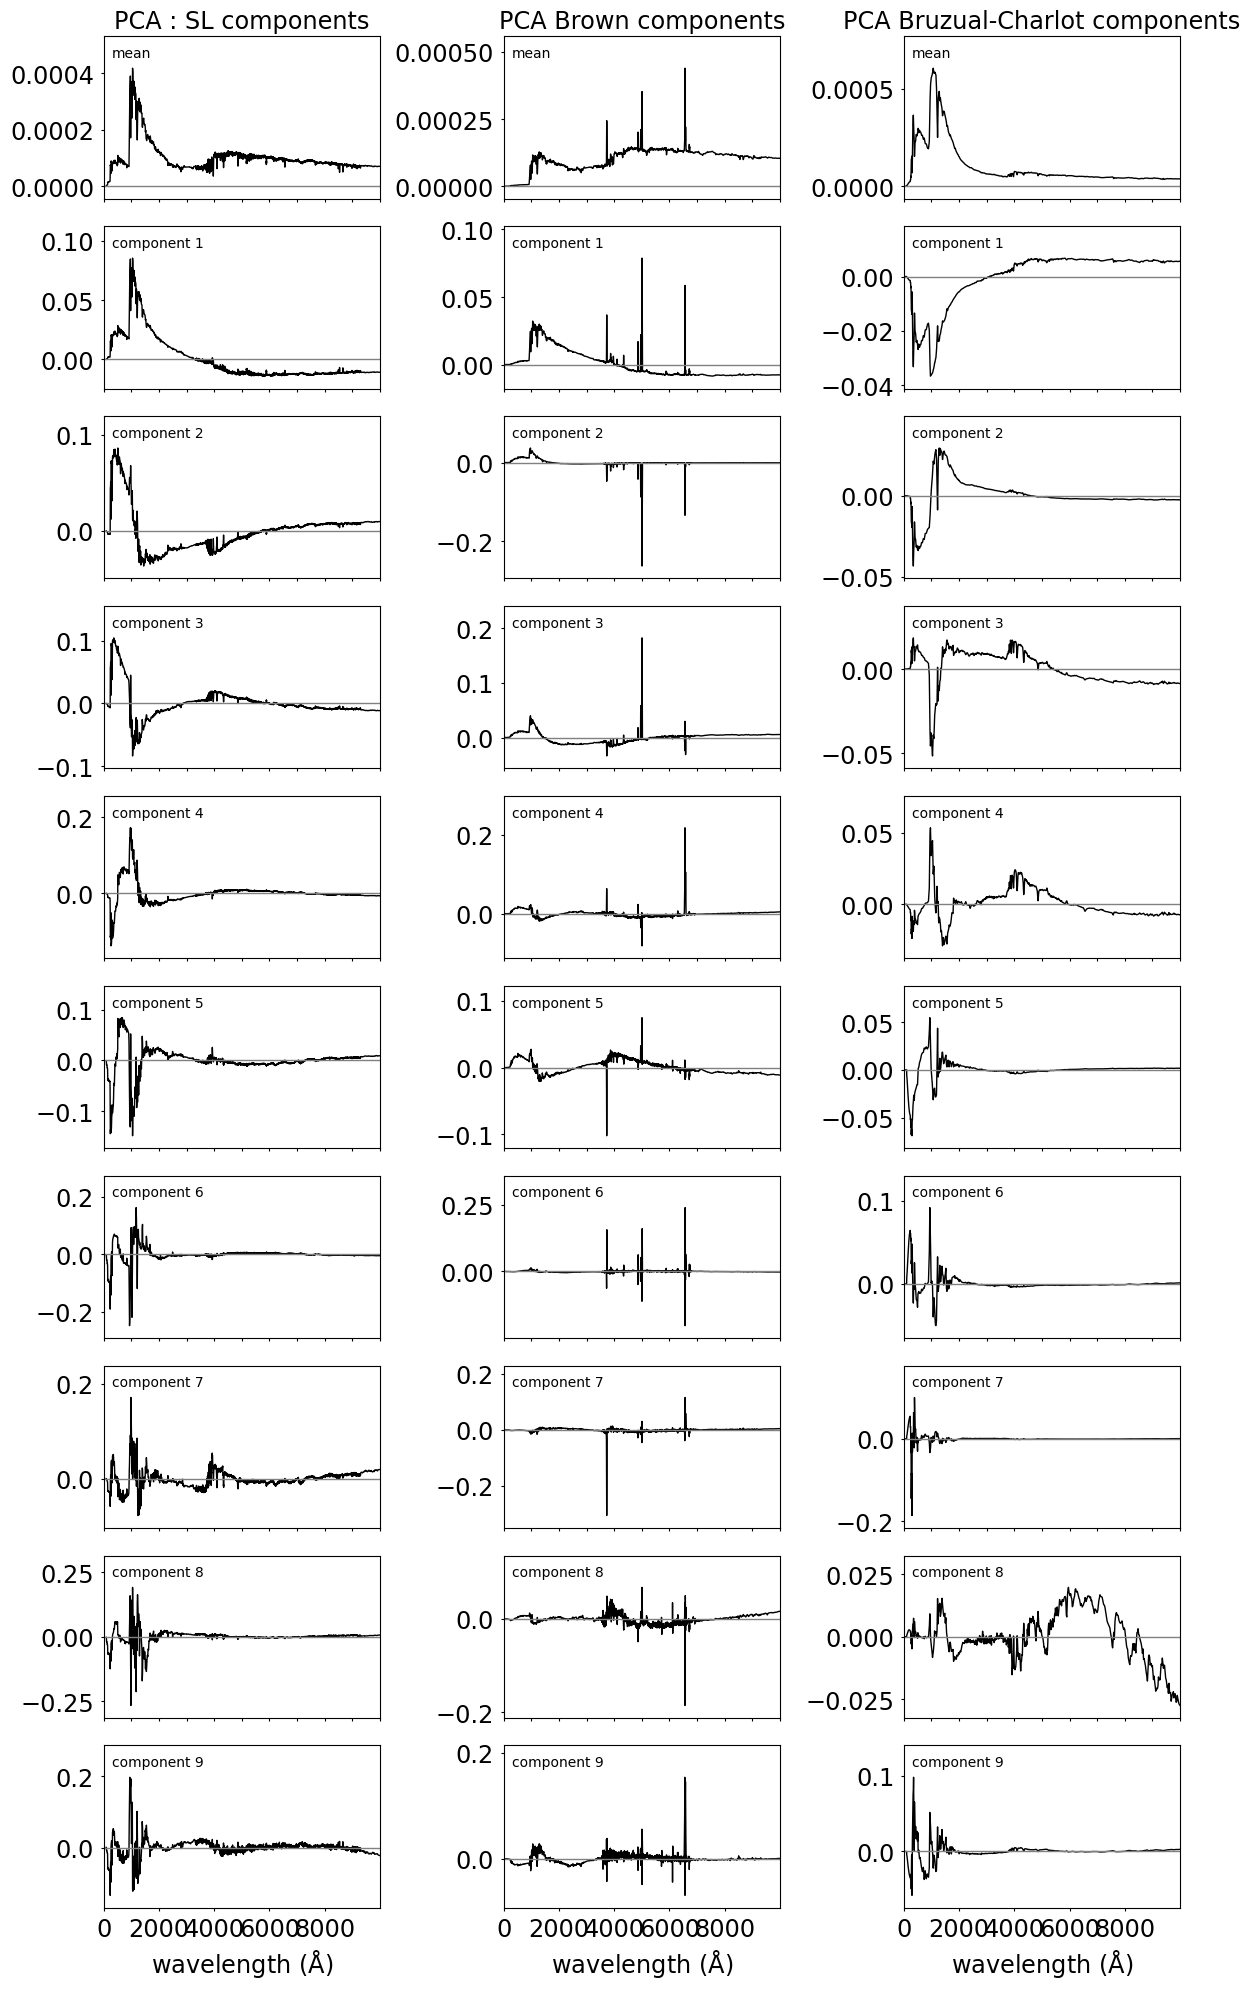

In [17]:
#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 20))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA : SL components', 'PCA Brown components', 'PCA Bruzual-Charlot components']

for i, comp in enumerate(all_decompositions):
      
    data_in=all_data_in[i]
    NSED = data_in.shape[0]-3
    NWL = data_in.shape[1]-1
    wavelengths = data_in[0,1:] 
    flambdas_average = data_in[1,1:] 
    flambdas_std = data_in[2,1:] 
    flux = data_in[3:,1:] 
    all_numbers = data_in[3:,0] 
    
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        #ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(0, 10000, 2000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [0, 10000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)

plt.tight_layout()
plt.show()


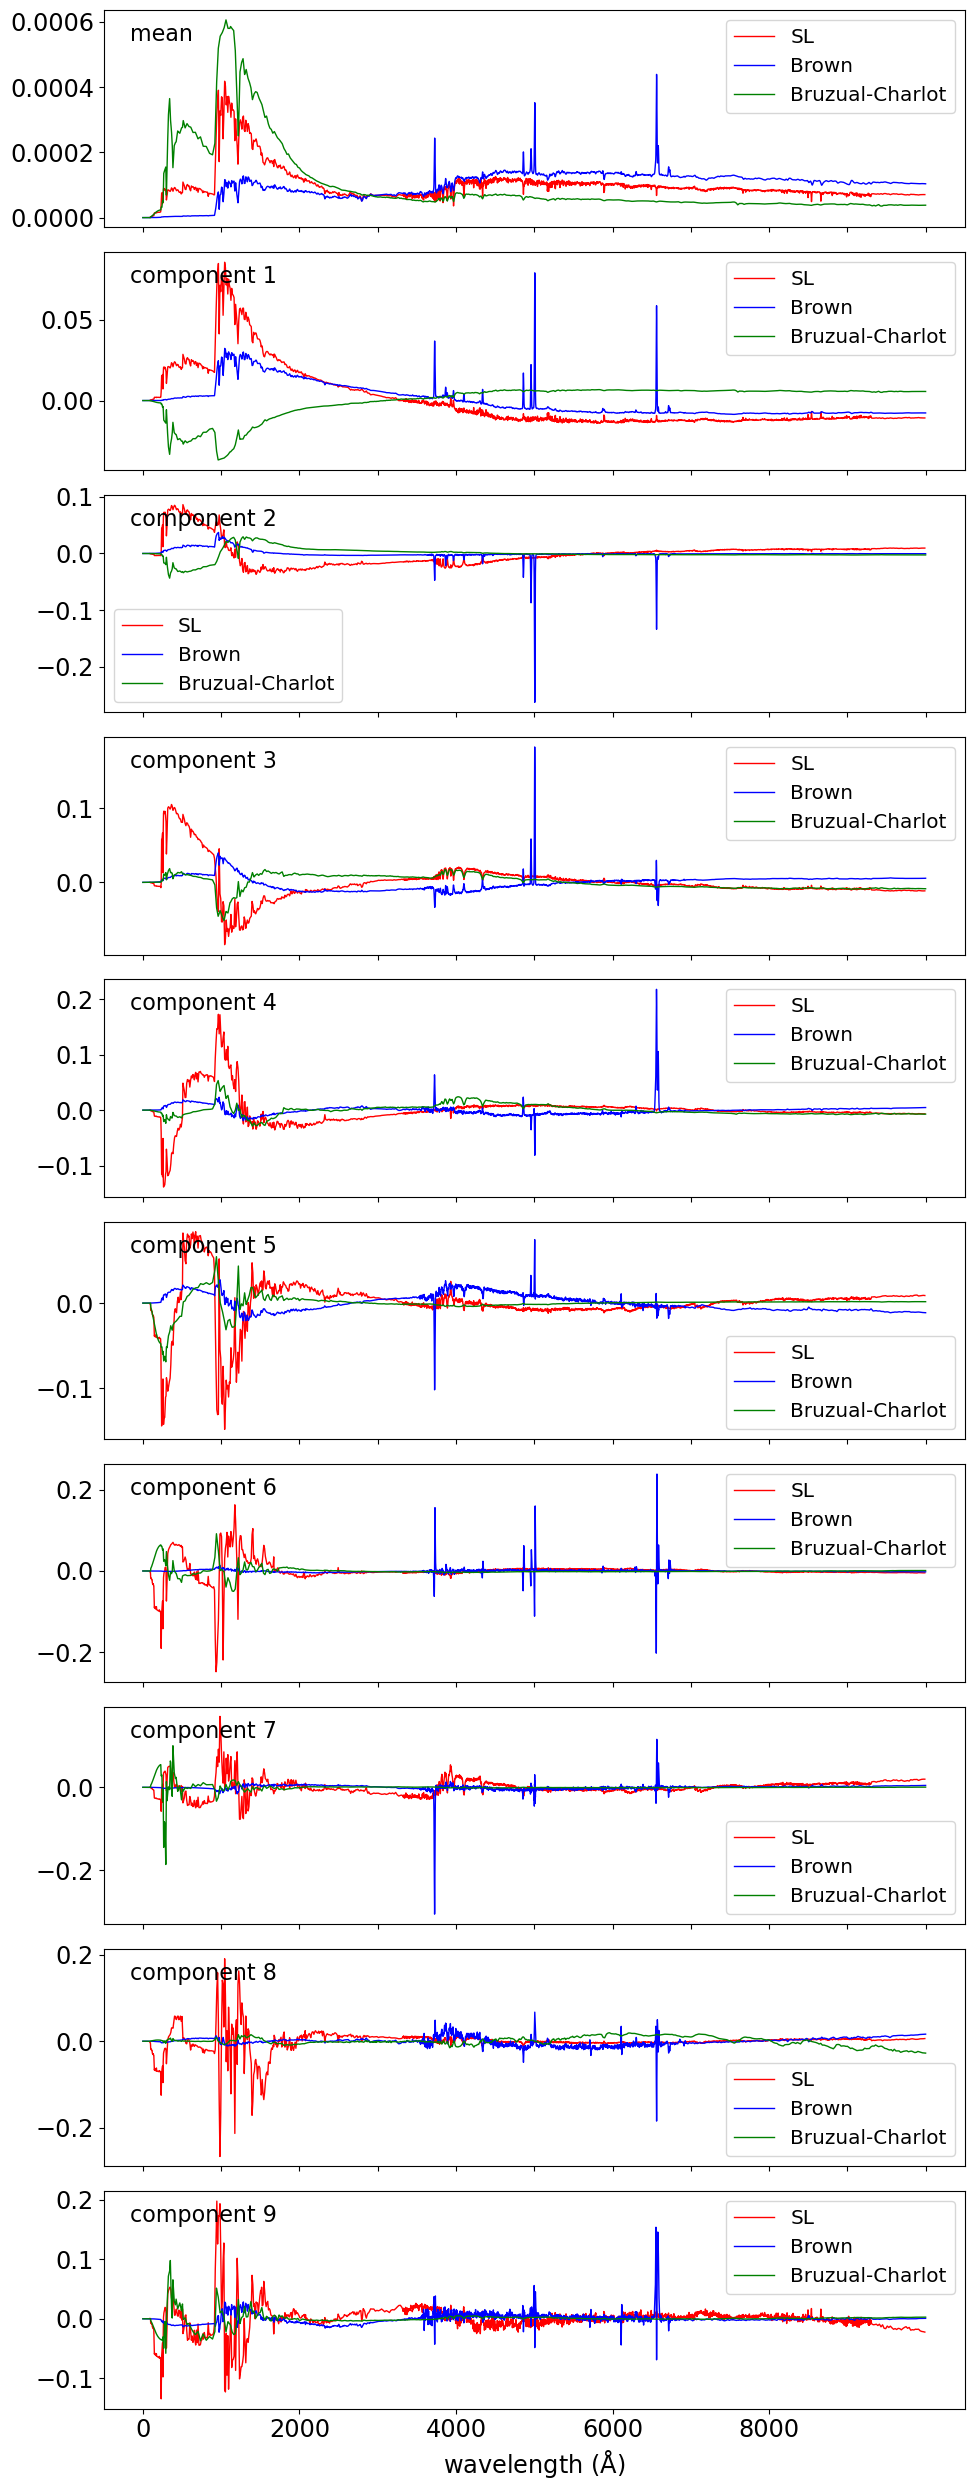

In [18]:
#----------------------------------------------------------------------
# Plot the results

#fig = plt.figure(figsize=(12, 40))
fig, ax = plt.subplots(n_components,1,figsize=(10,25))

titles = ['PCA : SL components', 'PCA Brown components', 'PCA Bruzual-Charlot components']
comp_cols = ['r','b','g']
all_labels = ['SL','Brown','Bruzual-Charlot']

for i, comp in enumerate(all_decompositions):
      
      
    data_in=all_data_in[i]
    NSED = data_in.shape[0]-3
    NWL = data_in.shape[1]-1
    wavelengths = data_in[0,1:] 
    flambdas_average = data_in[1,1:] 
    flambdas_std = data_in[2,1:] 
    flux = data_in[3:,1:] 
    all_numbers = data_in[3:,0] 
    
    
    for j in range(n_components):
        
        the_ax= ax[j]
        the_label=""
        the_ax.plot(wavelengths, comp[j], '-', c=comp_cols[i],lw=1,label=all_labels[i])
        
      
        if j == 0:
            label = 'mean'
        else:
            label = 'component %i' % (j )

        if i == 0:
            the_ax.text(0.03, 0.94, label, transform=the_ax.transAxes,ha='left', va='top',fontsize=16)
            
        if i==2:
            the_ax.legend()
            
            
        the_ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            the_ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            the_ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(0, 10000, 2000))))
            the_ax.set_xlabel(r'wavelength ${\rm (\AA)}$')   
    
     
plt.tight_layout()
plt.show()
